In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

# Gradient Boosting

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

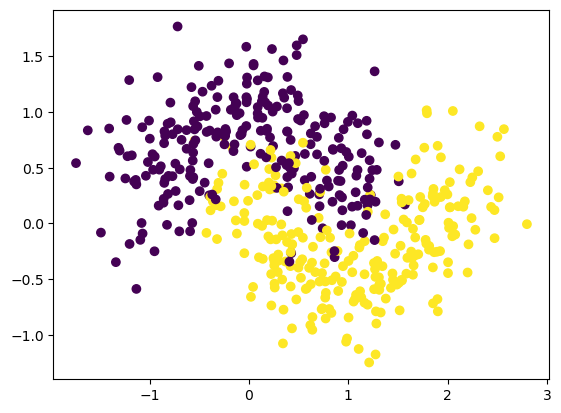

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

ada_clf = GradientBoostingClassifier(n_estimators=1, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=1, random_state=42)

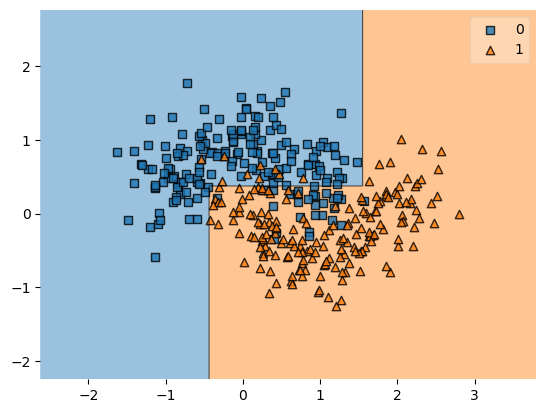

In [6]:
plot_decision_regions(X_train, y_train, ada_clf)
plt.show()

# Zad.

Sprawdż różne parametry dla GradientBoostingClassifier

* n_estimators=2, learning_rate=0.5
* n_estimators=2, learning_rate=1
* n_estimators=10, learning_rate=0.5
* n_estimators=10, learning_rate=1

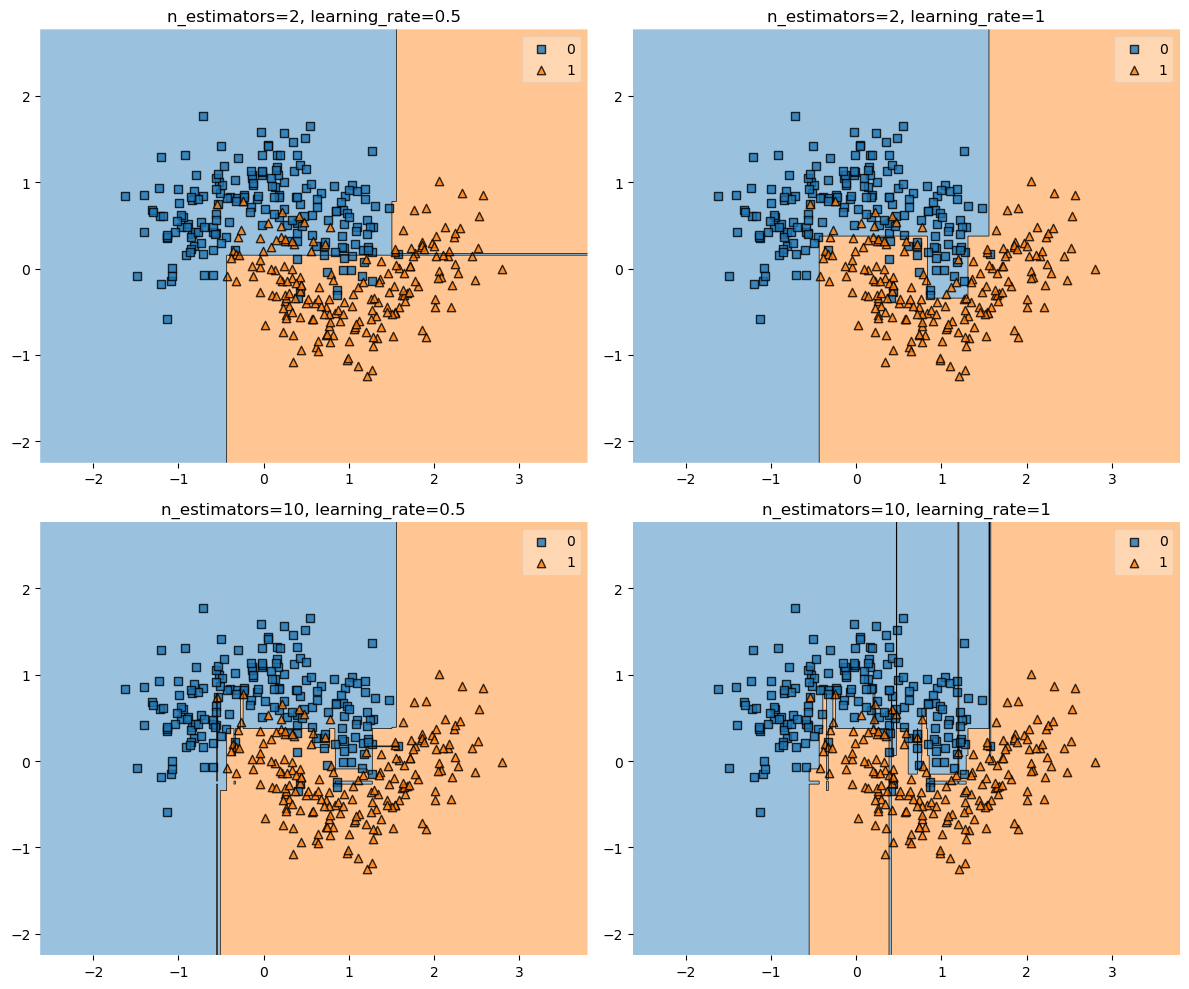

{'n_estimators=2, learning_rate=0.5': 0.88,
 'n_estimators=2, learning_rate=1': 0.88,
 'n_estimators=10, learning_rate=0.5': 0.88,
 'n_estimators=10, learning_rate=1': 0.856}

In [7]:
grad_boost_params = [
    {"n_estimators": 2, "learning_rate": 0.5},
    {"n_estimators": 2, "learning_rate": 1},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1},
]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, param in zip(axes.flatten(), grad_boost_params):
    grad_boost_clf = GradientBoostingClassifier(
        n_estimators=param["n_estimators"],
        learning_rate=param["learning_rate"],
        random_state=42,
    )
    grad_boost_clf.fit(X_train, y_train)
    plot_decision_regions(X_train, y_train, grad_boost_clf, ax=ax)
    ax.set_title(
        f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
    )

plt.tight_layout()
plt.show()

grad_boost_performance = {}
for param in grad_boost_params:
    grad_boost_clf = GradientBoostingClassifier(
        n_estimators=param["n_estimators"],
        learning_rate=param["learning_rate"],
        random_state=42,
    )
    grad_boost_clf.fit(X_train, y_train)
    accuracy = grad_boost_clf.score(X_test, y_test)
    grad_boost_performance[
        f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
    ] = accuracy

grad_boost_performance

# Zad.

Sprawdż różne parametry dla XGBClassifier

* n_estimators=2, learning_rate=0.5
* n_estimators=2, learning_rate=1
* n_estimators=10, learning_rate=0.5
* n_estimators=10, learning_rate=1

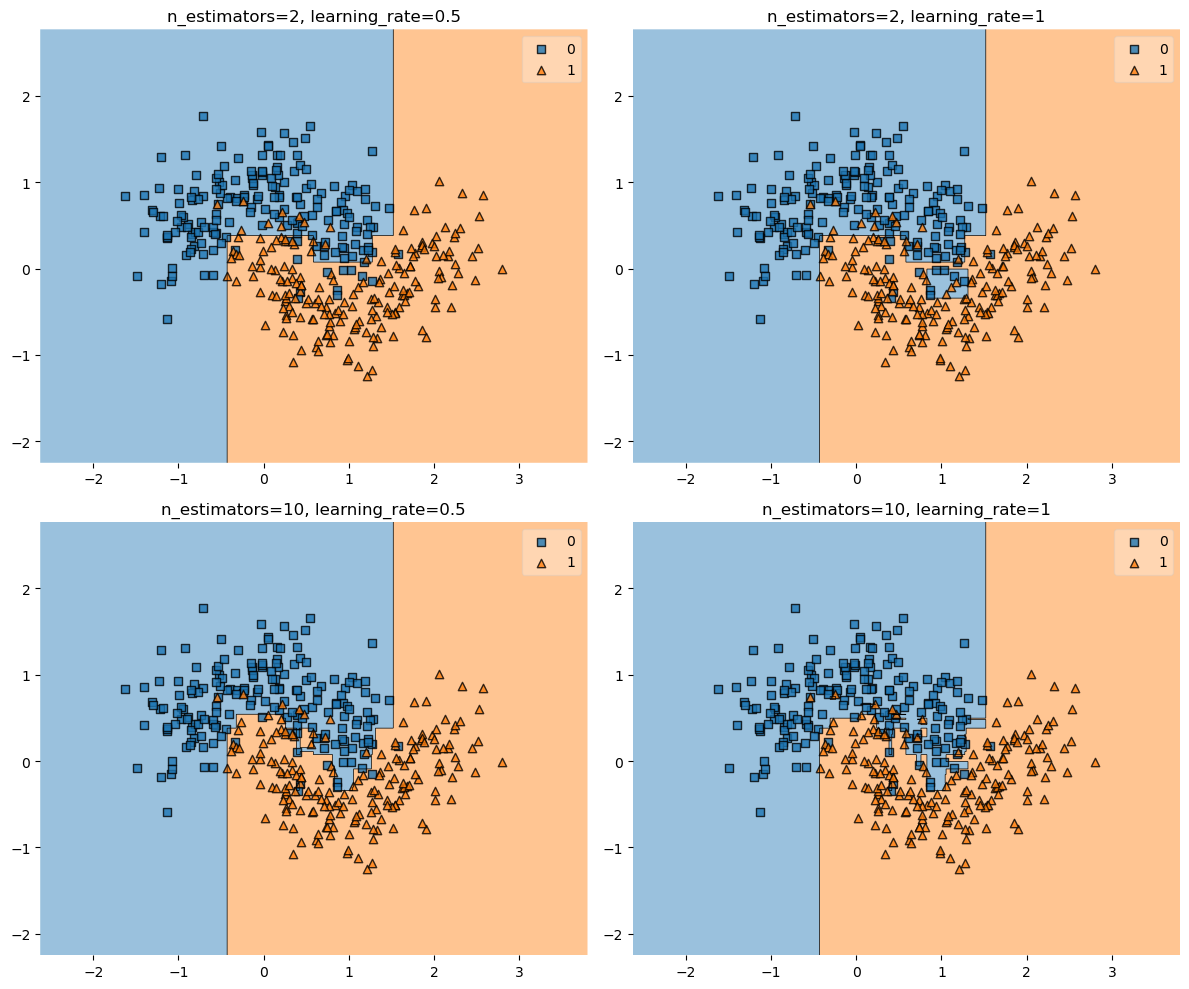

In [10]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


if XGBClassifier is not None:

    xgb_params = [
        {"n_estimators": 2, "learning_rate": 0.5},
        {"n_estimators": 2, "learning_rate": 1},
        {"n_estimators": 10, "learning_rate": 0.5},
        {"n_estimators": 10, "learning_rate": 1},
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for ax, param in zip(axes.flatten(), xgb_params):
        xgb_clf = XGBClassifier(
            n_estimators=param["n_estimators"],
            learning_rate=param["learning_rate"],
            random_state=42,
        )
        xgb_clf.fit(X_train, y_train)
        plot_decision_regions(X_train, y_train, xgb_clf, ax=ax)
        ax.set_title(
            f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
        )

    plt.tight_layout()
    plt.show()

    xgb_performance = {}
    for param in xgb_params:
        xgb_clf = XGBClassifier(
            n_estimators=param["n_estimators"],
            learning_rate=param["learning_rate"],
            random_state=42,
        )
        xgb_clf.fit(X_train, y_train)
        accuracy = xgb_clf.score(X_test, y_test)
        xgb_performance[
            f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
        ] = accuracy

    xgb_performance